In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 9

In [77]:
df = pd.read_csv('csvs/bombus_visit_durations.csv', parse_dates=["visit_start", "visit_end"])
bombus_visits_clover = df[df['visit_end'] < pd.Timestamp('2024-07-30')]
cam_bombus_counts = bombus_visits_clover['species'].value_counts()
cam_bombus_counts

species
vosnesenskii    173
fervidus         70
unk              31
griseocollis     13
nevadensis        2
mixtus            1
appositus         1
Name: count, dtype: int64

In [78]:
survey_data = pd.read_csv('csvs/Clover_Bee_occurrence_data.csv')
bvt_data  = survey_data[survey_data['Collection method'] == 'vane trap'].reset_index(drop=True)
net_data  = survey_data[survey_data['Collection method'] == 'net'].reset_index(drop=True)

bvt_taxa = bvt_data[['Order ', 'Genus', 'Species', 'Sex', 'Caste']]
bvt_bombus_counts = bvt_taxa[bvt_taxa['Genus'] == 'Bombus']['Species'].value_counts()

net_taxa = net_data[['Order ', 'Genus', 'Species', 'Sex', 'Caste']]
net_bombus_counts = net_taxa[net_taxa['Genus'] == 'Bombus']['Species'].value_counts()


In [79]:
species_all = list(set(cam_bombus_counts.index).union(bvt_bombus_counts.index, net_bombus_counts.index))

species_all = [
 'caliginosus',
 'mixtus',
 'appositus',
 'nevadensis',
 'griseocollis',
 'fervidus',
 'vosnesenskii']

counts_s1 = [cam_bombus_counts[species] if species in cam_bombus_counts.index else 0 for species in species_all]
# counts_s1 = [len(apis_visits_clover)] + counts_s1
counts_s2 = [bvt_bombus_counts[species] if species in bvt_bombus_counts.index else 0 for species in species_all]
# counts_s2 = [bvt_apis_counts['mellifera']] + counts_s2
counts_s3 = [net_bombus_counts[species] if species in net_bombus_counts.index else 0 for species in species_all]
# counts_s3 = [net_apis_counts['mellifera']] + counts_s3

df_counts = pd.DataFrame({
    'Species': species_all,
    'Camera': counts_s1,
    'BVT': counts_s2,
    'Net': counts_s3
})

# df_counts.to_csv('method_comparison_fig/sample_method_counts.csv', index=False)

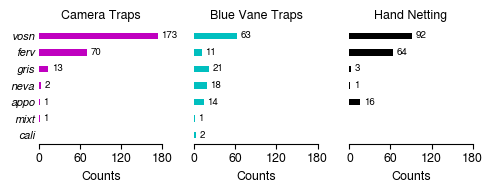

In [80]:
bar_width = 0.4  
species_all_reversed = list(reversed(species_all))
y_pos = range(len(species_all_reversed))  

fig, axs = plt.subplots(1, 3, figsize=(5, 2), sharey=True)

axs[0].set_yticks(y_pos)
axs[0].invert_yaxis()
axs[0].set_xlabel('Counts', size=9)
axs[0].set_title('Camera Traps', size=9)
bars0 = axs[0].barh(y_pos, list(reversed(counts_s1)), height=bar_width, color='m')
for bar, count in zip(bars0, list(reversed(counts_s1))):
    if count != 0:
        axs[0].text(
            bar.get_width() + 5,
            bar.get_y() + bar.get_height()/2,
            str(count),
            va='center',
            ha='left',
            size=7
        )

bars1 = axs[1].barh(y_pos, list(reversed(counts_s2)), height=bar_width, color='c')
for bar, count in zip(bars1, list(reversed(counts_s2))):
    if count != 0:
        axs[1].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(count),
                    va='center', ha='left', size=7)
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels([])  
axs[1].invert_yaxis()
axs[1].set_xlabel('Counts', size=9)
axs[1].set_title('Blue Vane Traps', size=9)

bars2 = axs[2].barh(y_pos, list(reversed(counts_s3)), height=bar_width, color='k')
for bar, count in zip(bars2, list(reversed(counts_s3))):
    if count != 0:
        axs[2].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(count),
                    va='center', ha='left', size=7)
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels([]) 
axs[2].invert_yaxis()
axs[2].set_xlabel('Counts', size=9)
axs[2].set_title('Hand Netting', size=9)

for ax in axs:
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length=0)
    ax.set_xlim(0, 180)
    ax.set_xticks(range(0, 181, 60))


axs[0].set_yticklabels(
    [label[:4] for label in species_all_reversed],
    style='italic',
    size=8
)
plt.tight_layout()
plt.savefig('figs/methods_comparison_separated.svg', format='svg')